In [1]:
import sys # for automation and parallelisation
manual, scenario = (True, 'base_test') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])
if manual:
    %matplotlib inline


Bad key text.latex.preview in file C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import cm
from shapely import geometry
from quetzal.model import stepmodel
from syspy.skims import skims

# Preparation of the LoS tables
## Validates rail service connections
## Needs PT LoS table

In [3]:
input_path = '../input_static/level_of_service/'
output_path = '../output/' + scenario + '/'
model_path = '../model/'

In [4]:
sm = stepmodel.read_zippedpickles(model_path + scenario + '/' + 'de_pt_los')

pt_los: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.23s/it]


In [8]:
ln = stepmodel.read_json(model_path + scenario + '/' + 'de_pt_network_agg')
sm.zones = gpd.GeoDataFrame(ln.zones)

In [13]:
lines_air = [geometry.LineString([ln.links.loc[i, 'geometry'].coords[0] for i in l]
                             + [ln.links.loc[l[-1], 'geometry'].coords[-1]])
         for l in sm.pt_los.loc[sm.pt_los['route_type']=='air', 'link_path']]

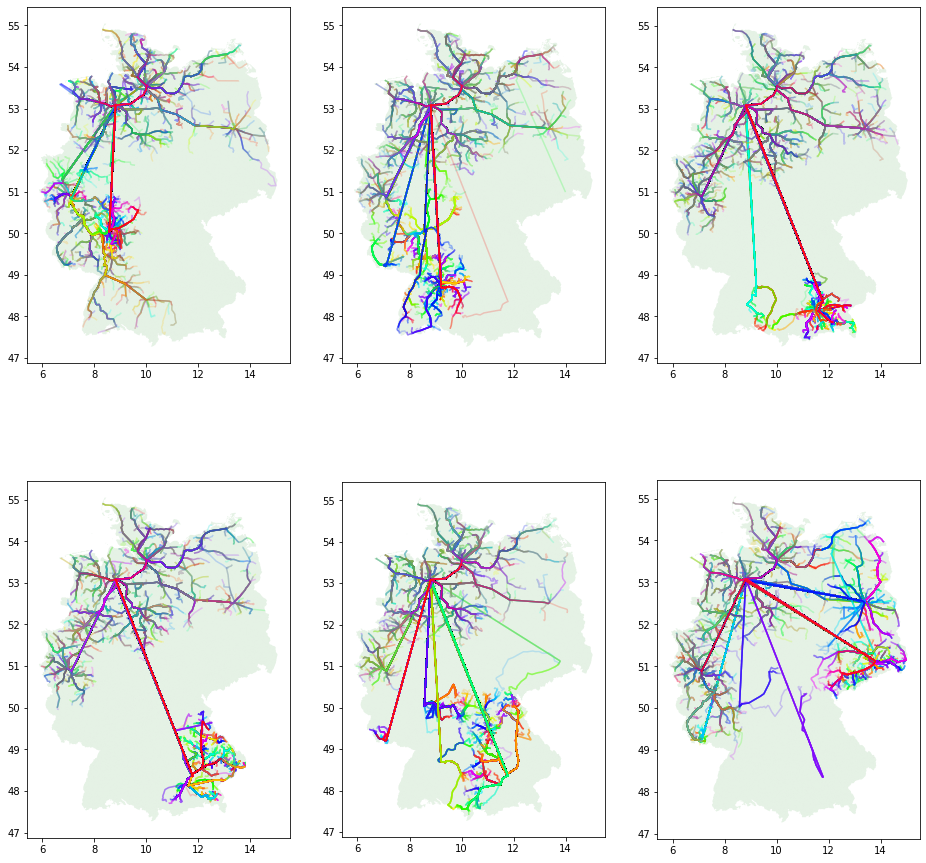

In [16]:
gdf = gpd.GeoDataFrame(geometry=lines_air, crs=sm.epsg)
cmap = cm.get_cmap('gist_rainbow')
nplots = 6
cut = int(len(gdf)/nplots)
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,16))
for i in range(nplots):
    row = 0 if i < 3 else 1
    gdf.iloc[i*cut:(i+1)*cut].plot(cmap=cmap, alpha=.2, ax=sm.zones.plot(
        color='g', alpha=.1, ax=axes[row,i%3]))

In [17]:
lines_rail_long = [geometry.LineString([ln.links.loc[i, 'geometry'].coords[0] for i in l]
                             + [ln.links.loc[l[-1], 'geometry'].coords[-1]])
         for l in sm.pt_los.loc[sm.pt_los['route_type']=='rail_long', 'link_path']]

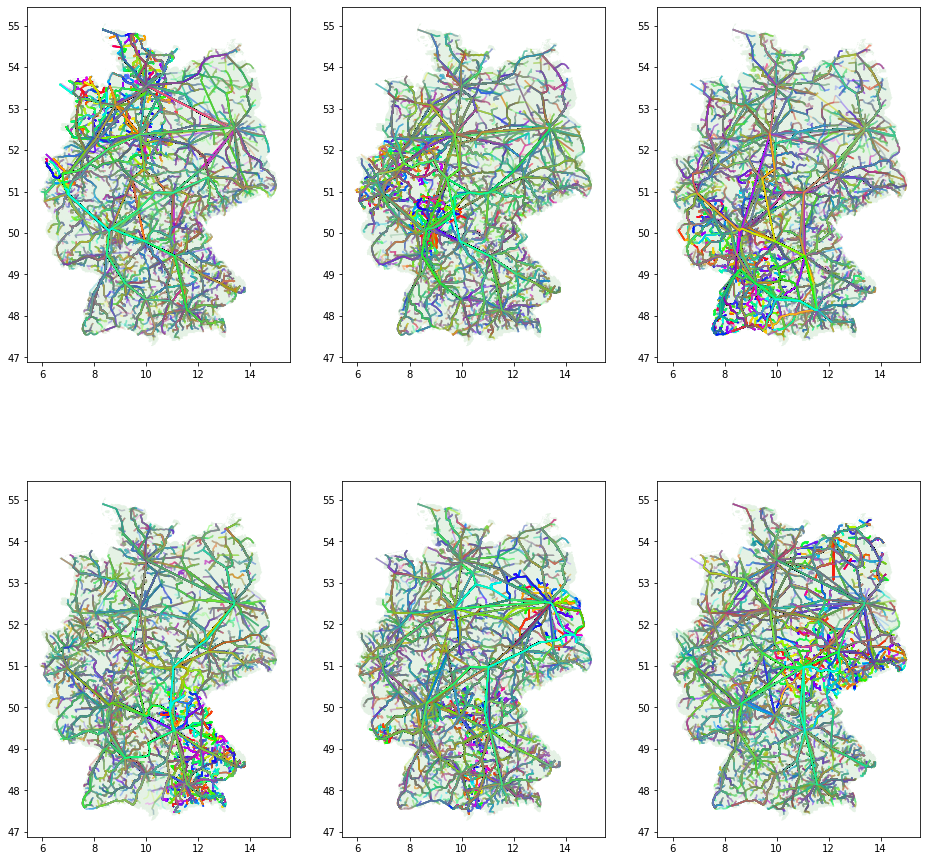

In [18]:
gdf = gpd.GeoDataFrame(geometry=lines_rail_long, crs=sm.epsg)
cmap = cm.get_cmap('gist_rainbow')
nplots = 6
cut = int(len(gdf)/nplots)
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,16))
for i in range(nplots):
    row = 0 if i < 3 else 1
    gdf.iloc[i*cut:(i+1)*cut].plot(cmap=cmap, alpha=.2, ax=sm.zones.plot(
        color='g', alpha=.1, ax=axes[row,i%3]))

In [19]:
gdf.to_file(model_path + scenario + '/' + 'validation_rail_long.geojson', driver='GeoJSON')